# Regularized Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

## Function
The function of regularized linear regression does not change, thus<br>
$
\begin{equation}
    f_{\overrightarrow{w}, b}(\overrightarrow{x})= \overrightarrow{w}.\overrightarrow{x} + b
\end{equation}
$

In [2]:
def function(x, w, b):
    return np.dot(x, w) + b

## Cost function
Cost function adds $\frac{\lambda}{2m}\sum_{i=1}^{m}w_i$ to reduce the weight a bit each time.<br>
$
\begin{equation}
\displaystyle
    J(\overrightarrow{w}, b) = \big[\frac{1}{2m}\sum_{i=1}^{m}(f_{\overrightarrow{w}, b}(\overrightarrow{x}^{(i)}) - y^{(i)})^2\big] + \big[\frac{\lambda}{2m}\sum_{j=1}^{m}w_{j}^2\big]
\end{equation}
$
<br>
$\lambda$: is regularization parameter

In [3]:
def cost(X, y, w, b, lambda_ = 0):
    m, n = X.shape
    cost_sum = 0
    for i in range(m):
        err = function(X[i], w, b) - y[i]
        cost_sum += err ** 2
    cost_sum = cost_sum / (2 * m)
    
    reg_sum = 0
    for j in range(n):
        reg_sum += w[j] ** 2
    reg_sum = reg_sum * (lambda_ / (2 * m))
    
    return cost_sum + reg_sum

## Gradient Descent

Gradient Descent algorithm is roughly the same but derivate of regularization term is added<br>
$
\begin{equation}
    \begin{cases}
        w_j = w_j - \alpha\frac{d}{dw_j}J(\overrightarrow{w}, b)\\
        b = b - \alpha\frac{d}{db}J(\overrightarrow{w}, b)
    \end{cases}
\end{equation}
$
<br>
We can also write: <br>
$
\begin{equation}
    \begin{cases}
    \displaystyle
        w_j = w_j - \alpha\bigg[\big(\frac{1}{m}\sum_{i=1}^{m}\big(f_{\overrightarrow{w}, b}(\overrightarrow{x}^{(i)}) - y^{(i)}\big)x_{j}^i\big) + \frac{\lambda}{m}w_j\bigg]\\
        \displaystyle
        b = b - \alpha\frac{1}{m}\sum_{i=1}^{m}\big(f_{\overrightarrow{w}, b}(\overrightarrow{x}^{(i)}) - y^{(i)}\big)
    \end{cases}
\end{equation}
$
<br>
Repeat until converges

In [4]:
def gradient(X, y, w, b, lambda_= 0):
    m, n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    
    for i in range(m):
        err = function(X[i], w, b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i][j]
        dj_db += err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_ / m) * w[j]
    
    return dj_dw, dj_db

In [5]:
def gradient_descent(X, y, init_w, init_b, alpha, cost_function, gradient_function, iterations = 1000, lambda_ = 0):
    w = copy.deepcopy(init_w)
    b = init_b
    
    for i in range(1, iterations + 1):
        dj_dw, dj_db = gradient_function(X, y, w, b, lambda_)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i % 1000 == 0:
            print(f'i: {i} w={w} b={b} cost={cost_function(X, y, w, b)}')
    return w, b

## Z-Normalization
This is also needed for multi-variable model to scale them
<br>
$
\begin{equation}
\displaystyle
    z = \frac{x - \mu}{\sigma}
\end{equation}
$

In [6]:
def z_normalization(X):
    mu = np.mean(X, axis=0)
    sigma = np.mean(X, axis=0)
    x_norm = (X - mu) / sigma
    return x_norm, mu, sigma

## Scale
We also can scale data<br>
$
\begin{equation}
\displaystyle
    s = \frac{x}{x_{max}}
\end{equation}
$

In [7]:
def scale(X):
    abs_max = np.max(np.abs(X), axis=0)
    x_scaled = X / abs_max
    return x_scaled, abs_max

## Examples and training
Let's test the functionality

In [8]:
df = pd.read_csv('Datasets\\red_wine_quality.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [9]:
x_train = np.c_[df['fixed acidity'], df['volatile acidity'], df['citric acid'],  df['residual sugar'],  
                df['chlorides'],  df['free sulfur dioxide'],  df['total sulfur dioxide'],  df['density'],  
                df['pH'],  df['sulphates'],  df['alcohol']]
y_train = np.array(df['quality'])
x_train = x_train.astype(np.longfloat)
y_train = y_train.astype(np.longfloat)

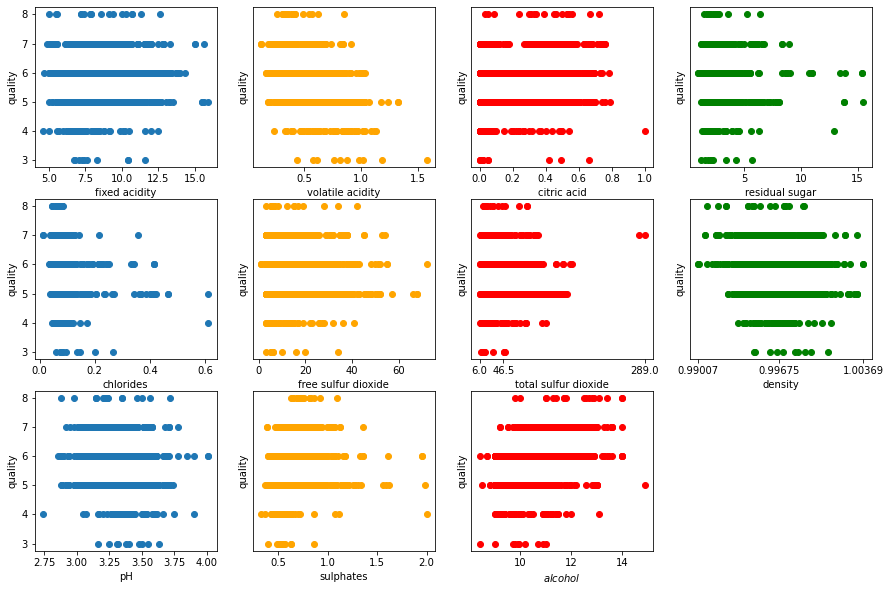

In [10]:
fig, ax = plt.subplots(3, 4, figsize=(15, 10))
### Row1
ax[0][0].scatter(x_train[:, 0], y_train);
ax[0][0].set_xlabel('fixed acidity')
ax[0][0].set_ylabel('quality');

ax[0][1].scatter(x_train[:, 1], y_train, c='orange');
ax[0][1].set_xlabel('volatile acidity')
ax[0][1].set_ylabel('quality');
ax[0][1].tick_params(left=False, labelleft=False)

ax[0][2].scatter(x_train[:, 2], y_train, c='red');
ax[0][2].set_xlabel('citric acid')
ax[0][2].set_ylabel('quality');
ax[0][2].tick_params(left=False, labelleft=False)

ax[0][3].scatter(x_train[:, 3], y_train, c='green');
ax[0][3].set_xlabel('residual sugar')
ax[0][3].set_ylabel('quality');
ax[0][3].tick_params(left=False, labelleft=False)

### Row2
ax[1][0].scatter(x_train[:, 4], y_train);
ax[1][0].set_xlabel('chlorides')
ax[1][0].set_ylabel('quality');

ax[1][1].scatter(x_train[:, 5], y_train, c='orange');
ax[1][1].set_xlabel('free sulfur dioxide')
ax[1][1].set_ylabel('quality');
ax[1][1].tick_params(left=False, labelleft=False)

ax[1][2].scatter(x_train[:, 6], y_train, c='red');
ax[1][2].set_xlabel('total sulfur dioxide')
ax[1][2].set_ylabel('quality');
ax[1][2].tick_params(left=False, labelleft=False)
ax[1][2].set_xticks([x_train[:, 6].min(), x_train[:, 6].mean(), x_train[:, 6].max()])

ax[1][3].scatter(x_train[:, 7], y_train, c='green');
ax[1][3].set_xlabel('density')
ax[1][3].set_ylabel('quality');
ax[1][3].tick_params(left=False, labelleft=False)
ax[1][3].set_xticks([x_train[:, 7].min(), x_train[:, 7].mean(), x_train[:, 7].max()])

### Row 3
ax[2][0].scatter(x_train[:, 8], y_train);
ax[2][0].set_xlabel('pH')
ax[2][0].set_ylabel('quality');

ax[2][1].scatter(x_train[:, 9], y_train, c='orange');
ax[2][1].set_xlabel('sulphates')
ax[2][1].set_ylabel('quality');
ax[2][1].tick_params(left=False, labelleft=False)

ax[2][2].scatter(x_train[:, 10], y_train, c='red');
ax[2][2].set_xlabel('$alcohol$')
ax[2][2].set_ylabel('quality');
ax[2][2].tick_params(left=False, labelleft=False)

ax[2][3].set_visible(False)

In [11]:
x_norm, mu, sigma = z_normalization(x_train)
w_in, b_in = np.zeros_like(x_norm[0]), 0
w_out, b_out = gradient_descent(x_norm, y_train, w_in, b_in, 1, cost, gradient, 10000, 0)

i: 1000 w=[ 0.16649161 -0.58977697 -0.04862657  0.02203641 -0.15620525  0.06704991
 -0.14586881 -0.05394515 -0.97302876  0.58615353  3.00711568] b=5.636022514071287 cost=0.2087027805801073
i: 2000 w=[ 0.1064167  -0.58292147 -0.04931025  0.02247909 -0.16266426  0.07009458
 -0.15092717 -0.07187296 -1.39958625  0.58707956  3.03397331] b=5.636022514071287 cost=0.2085023499777983
i: 3000 w=[ 0.08309099 -0.58025653 -0.04954354  0.02266519 -0.16519291  0.07127983
 -0.15290831 -0.08493808 -1.56466239  0.58747864  3.04389707] b=5.636022514071287 cost=0.20847221353490136
i: 4000 w=[ 0.07410697 -0.57922229 -0.04963376  0.02274369 -0.16617108  0.07173794
 -0.15367469 -0.09611987 -1.62847972  0.58763849  3.04768033] b=5.636022514071287 cost=0.20846760999360178
i: 5000 w=[ 0.07067633 -0.57881948 -0.0496686   0.02278052 -0.16654887  0.07191449
 -0.15397068 -0.10656893 -1.65308786  0.58770568  3.04908606] b=5.636022514071287 cost=0.20846683489786916
i: 6000 w=[ 0.06939602 -0.57866118 -0.04968199  0.02

In [12]:
i = 123
x_test = x_train[i]
print(x_test, y_train[i])
x_test = (x_test - mu) / sigma
function(x_test, w_out, b_out)

[ 8.      0.71    0.      2.6     0.08   11.     34.      0.9976  3.44
  0.53    9.5   ] 5.0


5.0678621657787355

In [13]:
def accuracy(X, y, w, b):
    sum_err_perc = 0
    m, n = X.shape
    for i in range(m):
        our_y = function(X[i], w, b)
        sum_err_perc += 100 * (np.abs(y[i] - our_y)) / y[i]
    return 100 - (sum_err_perc / m)

In [14]:
ac = accuracy(x_norm, y_train, w_out, b_out)
print(f'The accuracy is {ac:.4f}%')

The accuracy is 90.8267%


The end